####  Airbnb(www.airbnb.com) is a hospitality company that runs an online marketplace for renting and leasing short-term lodging. 


It is interested in developing a pricing service for its users that will compute a recommended price based on the features of a listing. You are approached by Airbnb to develop a model for predicting nightly prices of Airbnb listings based on state-of-art techniques from statistical machine learning.

In this data, the names of the features are self-explanatory. 


The first column in the data provides an identifier for each listing. 



The response variable, price, is the second column in the training dataset. It gives the dollar price per night for each listing. 



Variables security_deposit, cleaning_fee and extra_people are also measured in dollars and correspond to surcharges. 


Variables latitude and longitude specify the geographic location of each property. 

Several variables are Boolean, with the word true recorded as “t” and false recorded as “f”.

In [699]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
colour=sns.color_palette()

In [700]:
air_df=pd.read_csv('D:\\Datascience\\datas\\airbnb_train.csv')

In [701]:
print(air_df.shape)

(1000, 30)


In [702]:
pd.set_option('display.max_column',30)
air_df.head()

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,0,150,f,22.0,t,-33.846469,151.205171,Apartment,Entire home/apt,2,1.0,1,1.0,500.0,330.0,0,7,1125,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,0.53
1,1,66,f,1.0,t,-33.895736,151.173529,Apartment,Private room,2,1.5,1,1.0,NaN,NaN,0,21,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,NaN
2,2,325,t,1.0,t,-33.879322,151.222408,House,Entire home/apt,4,2.0,2,2.0,500.0,180.0,0,3,90,21,99.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,moderate,2.38
3,3,145,f,1.0,f,-33.856874,151.149600,House,Entire home/apt,6,1.5,3,4.0,0.0,80.0,0,4,1125,3,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,flexible,1.96
4,4,200,f,6.0,t,-33.907150,151.178552,House,Entire home/apt,4,1.0,2,2.0,350.0,85.0,50,2,30,22,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,2.73


In [703]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
Id                             1000 non-null int64
price                          1000 non-null int64
host_is_superhost              998 non-null object
host_total_listings_count      998 non-null float64
host_identity_verified         998 non-null object
latitude                       1000 non-null float64
longitude                      1000 non-null float64
property_type                  1000 non-null object
room_type                      1000 non-null object
accommodates                   1000 non-null int64
bathrooms                      997 non-null float64
bedrooms                       1000 non-null int64
beds                           998 non-null float64
security_deposit               574 non-null float64
cleaning_fee                   693 non-null float64
extra_people                   1000 non-null int64
minimum_nights                 1000 non-null int64
maximum_nights  

from the above information we can see  that: 
'security_deposit- 574 non-null float64'almost 50% of the data is missing in this variable.
variables (review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value)- there is 35%- 40%missing variables.

Lets see the missing information graphically.

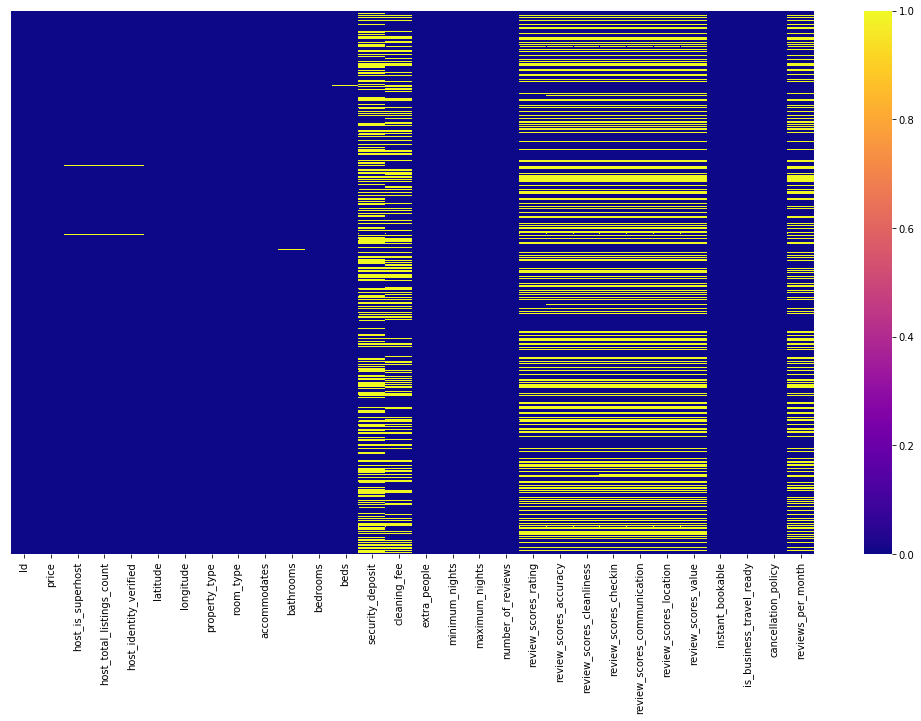

In [704]:
plt.figure(figsize=(18,10))
sns.heatmap(air_df.isnull(),yticklabels=False, xticklabels=air_df.columns, cmap='plasma')

Now, take the total no. of null values in each column

In [705]:
air_df.isnull().sum()

Id                               0
price                            0
host_is_superhost                2
host_total_listings_count        2
host_identity_verified           2
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        3
bedrooms                         0
beds                             2
security_deposit               426
cleaning_fee                   307
extra_people                     0
minimum_nights                   0
maximum_nights                   0
number_of_reviews                0
review_scores_rating           340
review_scores_accuracy         342
review_scores_cleanliness      342
review_scores_checkin          344
review_scores_communication    343
review_scores_location         344
review_scores_value            344
instant_bookable                 0
is_business_travel_ready         0
cancellation_policy 

Now lets map categorical variables and fill nan with appropriate values

first lets sort categorical variable having more than two categories (property_type,room_type, cancelltion policy) 

In [706]:
#air_df['room_type'].unique()

In [707]:
#air_df['room_type']=air_df['room_type'].map({'Entire home/apt':'0','Private room':1, 'Shared room':2})
#air_df['room_type']=air_df['room_type'].astype('category')

In [708]:
#air_df['cancellation_policy'].unique()

In [709]:
#air_df['cancellation_policy']=air_df['cancellation_policy'].map({'strict':'0', 'flexible':'2', 'moderate':'1'})
#air_df['cancellation_policy']=air_df['cancellation_policy'].astype('category')

In [710]:
air_df['property_type'].value_counts()

Apartment          651
House              254
Townhouse           32
Other               11
Bed & Breakfast      9
Guesthouse           8
Condominium          7
Villa                6
Cabin                6
Loft                 3
Guest suite          2
Boat                 2
Bungalow             2
Vacation home        2
Boutique hotel       1
Timeshare            1
Dorm                 1
In-law               1
Hostel               1
Name: property_type, dtype: int64

In [711]:
#label_Encoder

In [712]:
#for col in air_df.select_dtypes('object'):
    #air_df[col]=air_df[col].map({'f':'0', 't':'1'})
    
    
# Using for loop we have mapped all the categories in the categorical variables of the dataframe, into iterable categories 
#i.e.: false to 0 and True to 1 

In [713]:
#imputung the missing value of a categorical variable

In [714]:
for col in air_df.select_dtypes('object'):
    air_df[col]=air_df[col].fillna(air_df[col].value_counts().index[0])

In [715]:
#lets change all the 'Object to Category'

In [716]:
for col in air_df.select_dtypes('object'):
    air_df[col]=air_df[col].astype('category')
print(air_df.dtypes) 

Id                                int64
price                             int64
host_is_superhost              category
host_total_listings_count       float64
host_identity_verified         category
latitude                        float64
longitude                       float64
property_type                  category
room_type                      category
accommodates                      int64
bathrooms                       float64
bedrooms                          int64
beds                            float64
security_deposit                float64
cleaning_fee                    float64
extra_people                      int64
minimum_nights                    int64
maximum_nights                    int64
number_of_reviews                 int64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64


In [717]:
#imputing missing values for continious variables

In [718]:
num_miss=[]
for num in air_df.select_dtypes('float64'):
    if air_df[num].isnull().sum()!=0:
        air_df[num]=air_df[num].fillna(air_df[num].mean())

In [719]:
air_df.head(10)

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,0,150,f,22.0,t,-33.846469,151.205171,Apartment,Entire home/apt,2,1.0,1,1.0,500.000000,330.000000,0,7,1125,1,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,f,f,strict,0.530000
1,1,66,f,1.0,t,-33.895736,151.173529,Apartment,Private room,2,1.5,1,1.0,395.393728,75.176046,0,21,30,0,93.322727,9.537994,9.235562,9.730183,9.732116,9.637195,9.39939,f,f,flexible,1.203745
2,2,325,t,1.0,t,-33.879322,151.222408,House,Entire home/apt,4,2.0,2,2.0,500.000000,180.000000,0,3,90,21,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.00000,f,f,moderate,2.380000
3,3,145,f,1.0,f,-33.856874,151.149600,House,Entire home/apt,6,1.5,3,4.0,0.000000,80.000000,0,4,1125,3,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,f,f,flexible,1.960000
4,4,200,f,6.0,t,-33.907150,151.178552,House,Entire home/apt,4,1.0,2,2.0,350.000000,85.000000,50,2,30,22,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,f,f,moderate,2.730000
5,5,360,f,1.0,f,-33.893954,151.244907,House,Entire home/apt,6,1.0,3,4.0,395.393728,70.000000,0,2,1125,7,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,f,f,flexible,0.280000
6,6,350,f,1.0,t,-33.889091,151.277290,Apartment,Entire home/apt,4,1.0,2,2.0,395.393728,50.000000,0,2,1125,2,90.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.00000,t,f,moderate,0.160000
7,7,117,f,1.0,t,-33.878998,151.233890,Apartment,Entire home/apt,2,1.0,1,1.0,395.393728,35.000000,30,1,1125,5,80.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.00000,f,f,moderate,0.450000
8,8,188,f,2.0,t,-33.887270,151.273031,Apartment,Entire home/apt,6,1.0,2,3.0,0.000000,80.000000,40,3,365,73,92.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.00000,t,t,strict,2.930000
9,9,120,f,1.0,t,-33.895825,151.259695,Apartment,Entire home/apt,2,1.0,1,1.0,395.393728,75.176046,0,1,1125,0,93.322727,9.537994,9.235562,9.730183,9.732116,9.637195,9.39939,t,f,flexible,1.203745


In [720]:
air_df.shape

(1000, 30)

In [721]:
air_df.isnull().any()

Id                             False
price                          False
host_is_superhost              False
host_total_listings_count      False
host_identity_verified         False
latitude                       False
longitude                      False
property_type                  False
room_type                      False
accommodates                   False
bathrooms                      False
bedrooms                       False
beds                           False
security_deposit               False
cleaning_fee                   False
extra_people                   False
minimum_nights                 False
maximum_nights                 False
number_of_reviews              False
review_scores_rating           False
review_scores_accuracy         False
review_scores_cleanliness      False
review_scores_checkin          False
review_scores_communication    False
review_scores_location         False
review_scores_value            False
instant_bookable               False
i

#### So now that we have we have dealt with all the null values we can now go ahead with extensive data exploration.

### Explainatory Data Analysis 

C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Frequency')

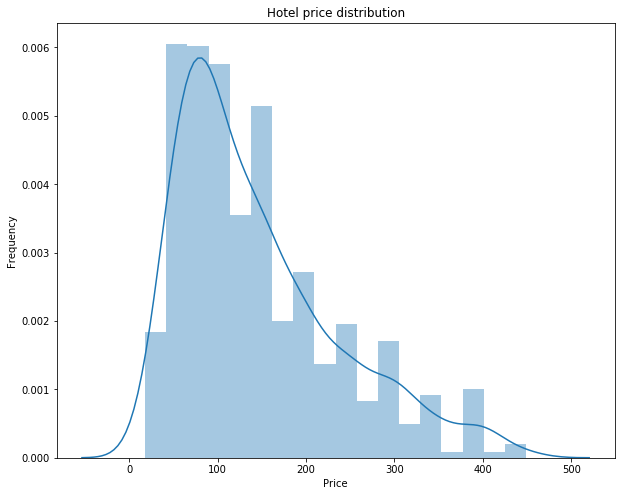

In [722]:
plt.figure(figsize=(10,8))
sns.distplot(air_df['price'])
plt.title('Hotel price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

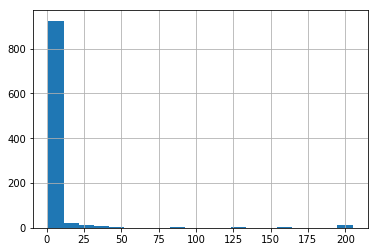

In [723]:
air_df['host_total_listings_count'].hist(bins=20)

C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


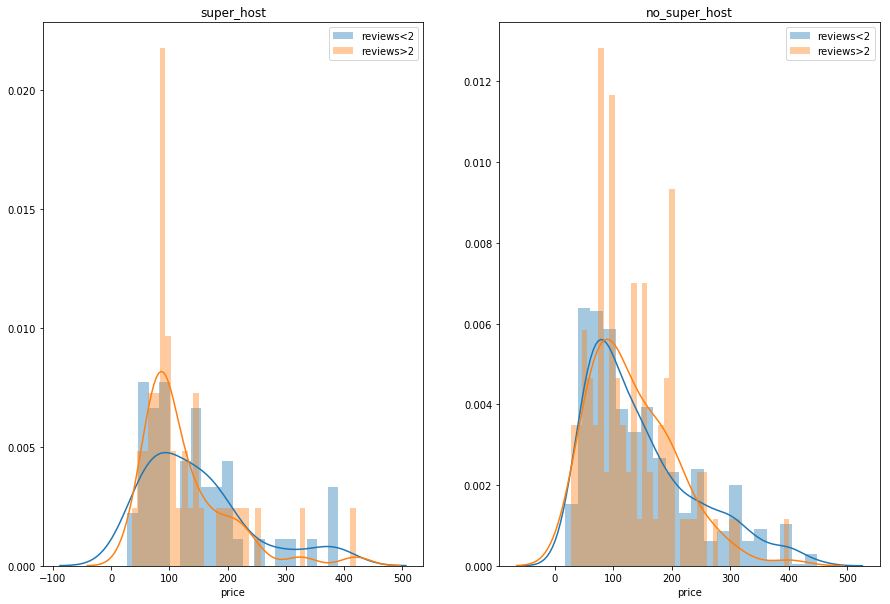

In [724]:
plt.figure(figsize=(15,10))
super_host=air_df[air_df['host_is_superhost']=='t']
no_super_host=air_df[air_df['host_is_superhost']=='f']
plt.subplot(1,2,1)
sns.distplot(super_host[super_host['reviews_per_month']<=2].price, bins=20, label='reviews<2')
sns.distplot(super_host[super_host['reviews_per_month']>2].price, bins=40, label='reviews>2')
plt.title('super_host')
plt.legend()
plt.subplot(1,2,2)
sns.distplot(no_super_host[no_super_host['reviews_per_month']<=2].price, bins=20, label='reviews<2')
sns.distplot(no_super_host[no_super_host['reviews_per_month']>2].price, bins=40, label='reviews>2')
plt.title('no_super_host')
plt.legend()


from the above distribution of data. there is no difference in the price range between and super host and a normal host,
other observatio are:
A normal host there is a high chance of price falling in less than 300 range, hotel with review > 2 has a really very high chance of price falling between 100 to 200

In [725]:
#lets see how the price relation ship between between price and othe columns
num_col=[]
for col in air_df.select_dtypes(('float64', 'int64')):
    num_col.append(col)

In [726]:
num_col

['Id',
 'price',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

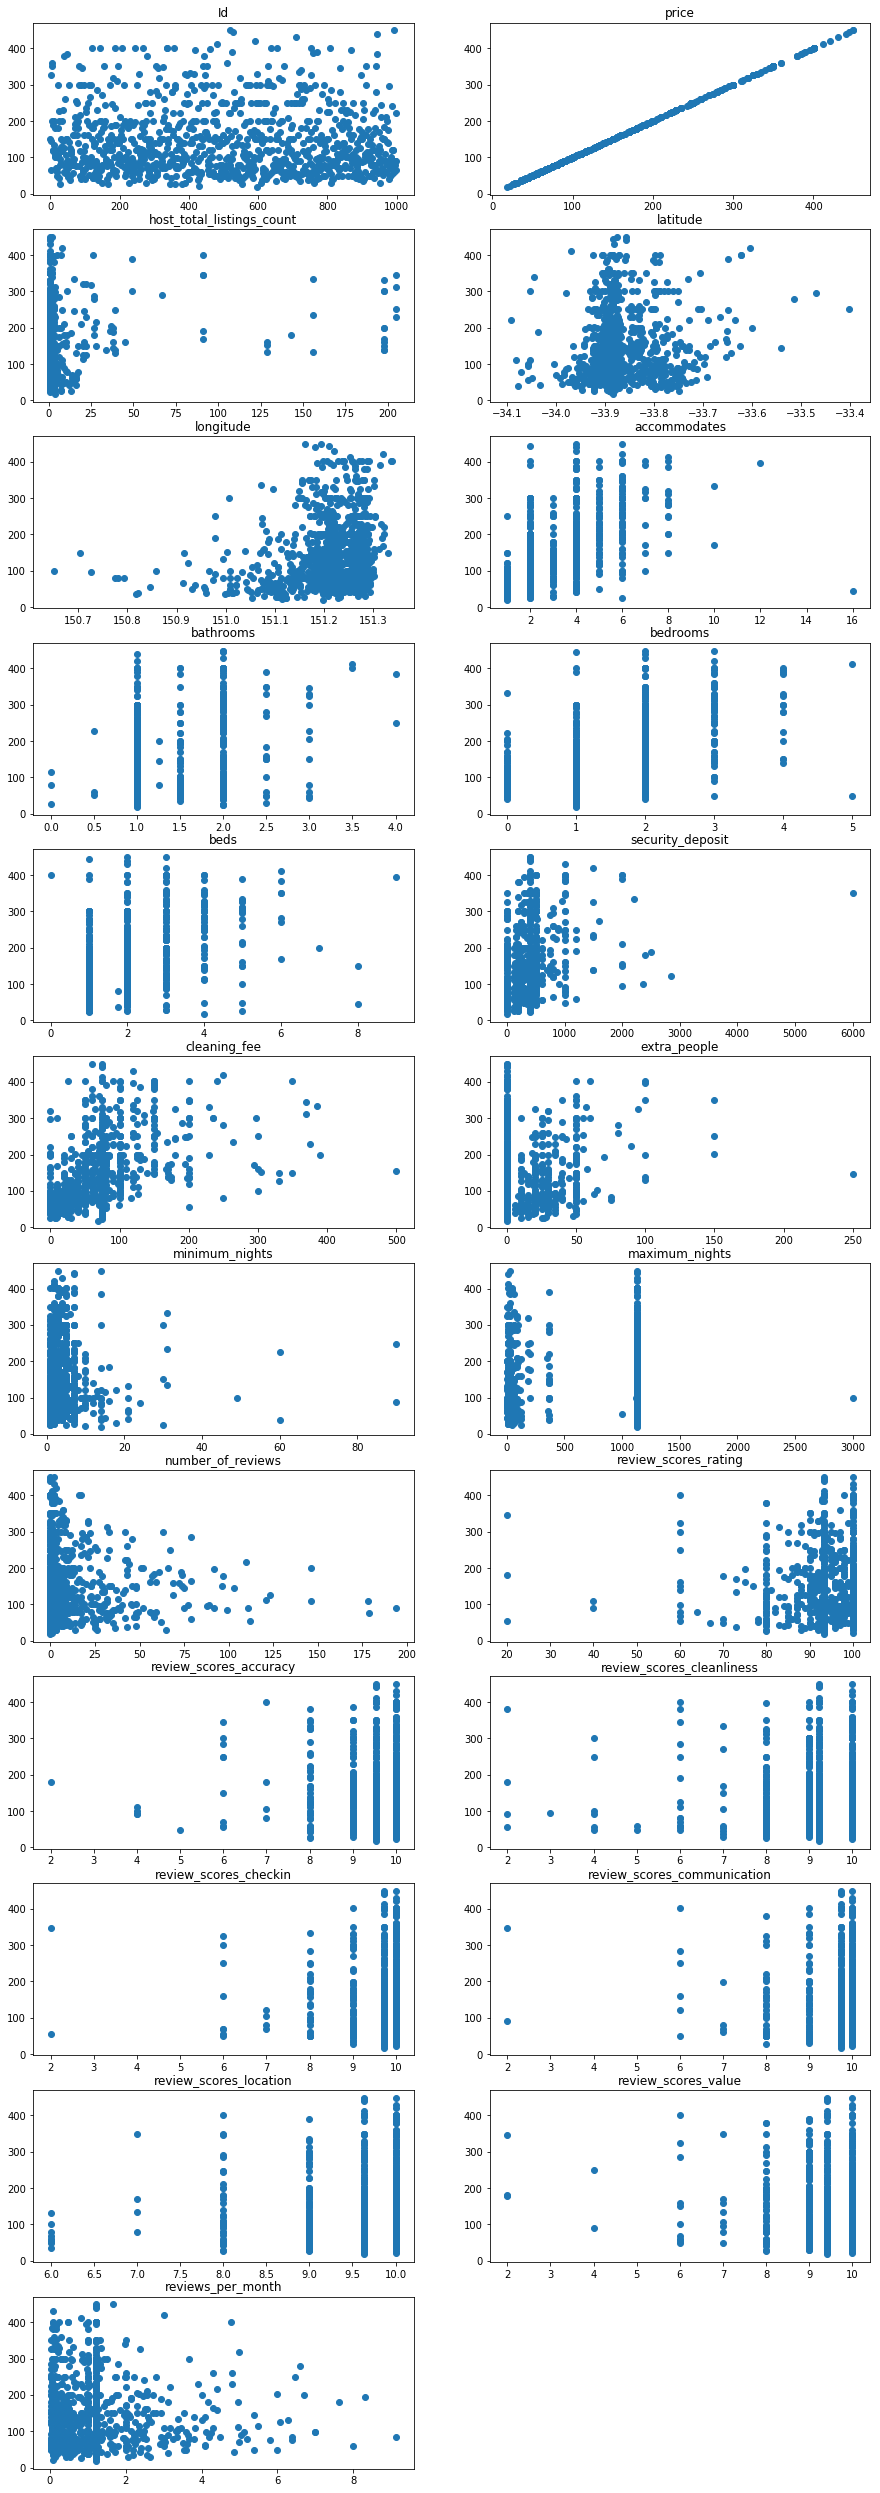

In [727]:
plt.figure(figsize=(15,45))
n=1
for x in num_col:
    plt.subplot(12,2,n)
    plt.scatter(air_df[x],air_df['price'])
    plt.title(x)
    n=n+1
    #plt.tight_layout()
    
plt.show()

In [728]:
n=1
for x in num_col:
    corr=air_df['price'].corr(air_df[x])
    print(x,corr)
    n=n+1

Id -0.04026798331141544
price 0.9999999999999992
host_total_listings_count 0.16484956534569792
latitude 0.09247182476739689
longitude 0.23157556819454467
accommodates 0.6250689194451257
bathrooms 0.33243153395772884
bedrooms 0.573647611325587
beds 0.5300159095336583
security_deposit 0.2539232393194838
cleaning_fee 0.4260185412832435
extra_people 0.09882260945109227
minimum_nights 0.04320936135190704
maximum_nights 0.030579744572290023
number_of_reviews -0.04020036777080382
review_scores_rating 0.015664533855167317
review_scores_accuracy -0.010654013288392978
review_scores_cleanliness 0.0152462622450041
review_scores_checkin -0.008805873774546289
review_scores_communication -0.03578301216792146
review_scores_location 0.09838331349044213
review_scores_value -0.06087183207107058
reviews_per_month -0.05705478495712307


##### Summary relation between price and other indepented variables from the scatter plot and correlation.
- Accomodates:
as the range of accommodates increases so does the price increases, the average starting range for more than 4 accommodates is higher
- bedrooms, beds: 
price increases with the increase in no. of bedrooms and beds
- cleaning fee:
most of the places charges between 0-100, cleaning fee higher than 200 price/night is higher as compare to the lower ranges
- longitude :
151.0 to 151.3 has higher price range as compared to longitude <151.



In [729]:
air_df['review_scores_cleanliness'].unique()

array([10.        ,  9.23556231,  9.        ,  8.        ,  5.        ,
        7.        ,  2.        ,  3.        ,  6.        ,  4.        ])

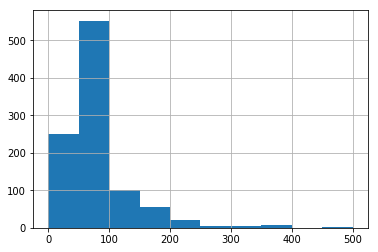

In [730]:
air_df['cleaning_fee'].hist(bins=10)

C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


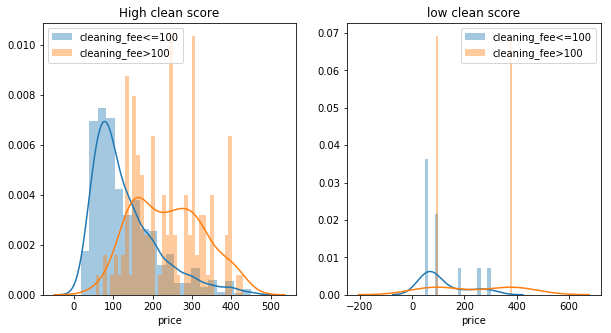

In [731]:
plt.figure(figsize=(10,5))
high_clean_score=air_df[air_df['review_scores_cleanliness']>5]
low_clean_score=air_df[air_df['review_scores_cleanliness']<=5]
plt.subplot(1,2,1)
sns.distplot(high_clean_score[high_clean_score['cleaning_fee']<=100].price, bins=20, label='cleaning_fee<=100')
sns.distplot(high_clean_score[high_clean_score['cleaning_fee']>100].price, bins=40, label='cleaning_fee>100')
plt.title('High clean score')
plt.legend()
plt.subplot(1,2,2)
sns.distplot(low_clean_score[low_clean_score['cleaning_fee']<=100].price, bins=20, label='cleaning_fee<=100')
sns.distplot(low_clean_score[low_clean_score['cleaning_fee']>100].price, bins=40, label='cleaning_fee>100')
plt.title('low clean score')
plt.legend()

from the above plot observation we can say that,almost 80-85 % of the places have received cleaniness score>5,
for cleaning fee <=100, hight probabily of price range between 50 to 150.
cleaning fee >100 has price range between 150 to 350

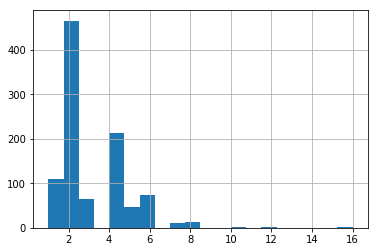

In [732]:
air_df['accommodates'].hist(bins=20)

C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,'Apartment'),
 Text(0,0,'Bed & Breakfast'),
 Text(0,0,'Boat'),
 Text(0,0,'Boutique hotel'),
 Text(0,0,'Bungalow'),
 Text(0,0,'Cabin'),
 Text(0,0,'Condominium'),
 Text(0,0,'Dorm'),
 Text(0,0,'Guest suite'),
 Text(0,0,'Guesthouse'),
 Text(0,0,'Hostel'),
 Text(0,0,'House'),
 Text(0,0,'In-law'),
 Text(0,0,'Loft'),
 Text(0,0,'Other'),
 Text(0,0,'Timeshare'),
 Text(0,0,'Townhouse'),
 Text(0,0,'Vacation home'),
 Text(0,0,'Villa')]

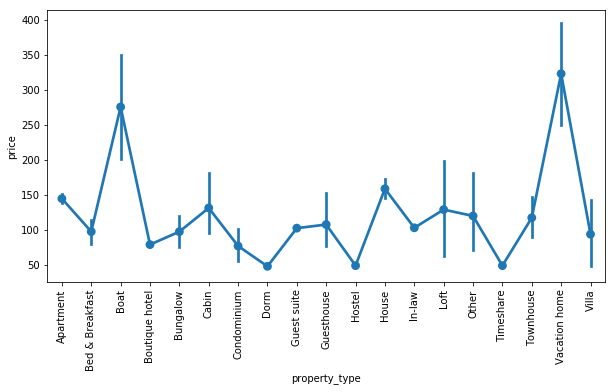

In [733]:
plt.figure(figsize=(10,5))
chart=sns.pointplot(x='property_type', y='price', data=air_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


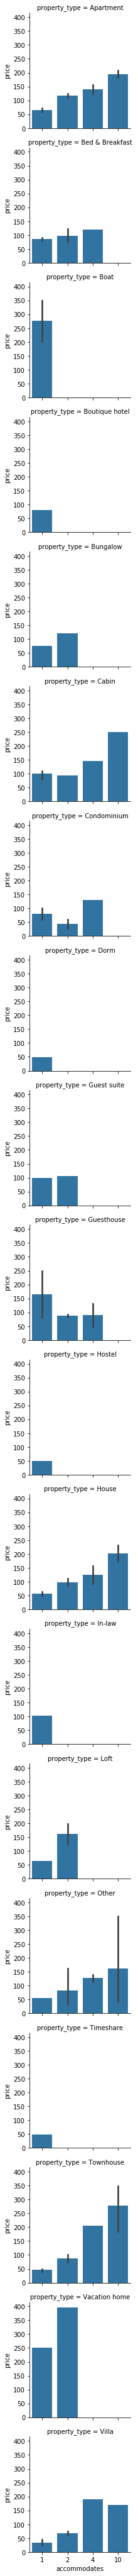

In [734]:
FacetGrid=sns.FacetGrid(air_df,row='property_type')
FacetGrid.map(sns.barplot,'accommodates', 'price',palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

####### We notice that properties like 
Boat and vacation home- price range is very high with fewer accomodation
villa, town house, house, cabin and appratment has accommodation ranging from 1to 10 at a price range 50 to 200.


C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


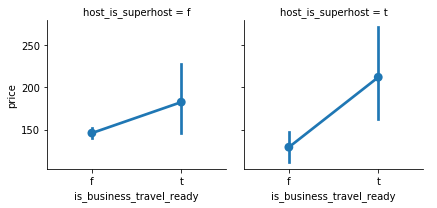

In [735]:
FacetGrid=sns.FacetGrid(air_df,col='host_is_superhost')
FacetGrid.map(sns.pointplot,'is_business_travel_ready', 'price', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

from the about graph we can infer that in generally the price for business purpose is higher. Also, price range for super host business purpose bookings are having a higher price range

Text(0.5,1,'minimum/nights')

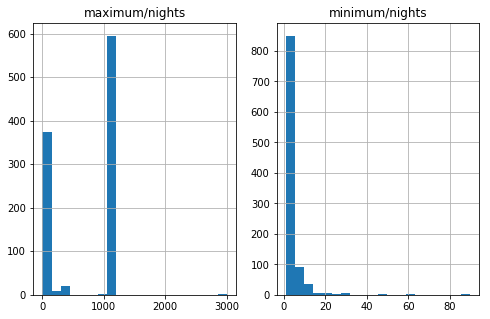

In [736]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
air_df['maximum_nights'].hist(bins=20)
plt.title('maximum/nights')
plt.subplot(1,2,2)
air_df['minimum_nights'].hist(bins=20)
plt.title('minimum/nights')

from the above graph we can infer that around 60% of places charges 1000+ night charges (max range)

Lets check for outliers in each column

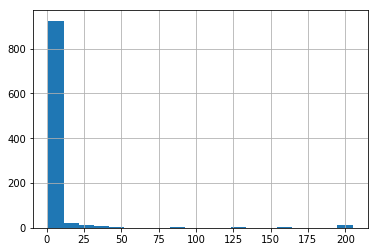

In [737]:
air_df['host_total_listings_count'].hist(bins=20)

C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


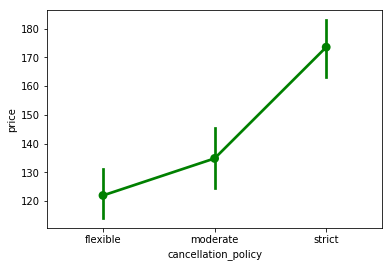

In [738]:
sns.pointplot(air_df['cancellation_policy'],air_df['price'], color='green')

from the above plot we can learn that the price range increase as the cancellation policy moves form flexible to strict

No handles with labels found to put in legend.


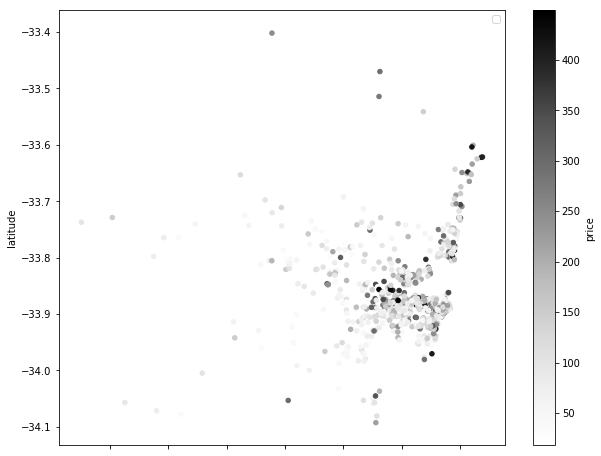

In [739]:
air_df.plot(kind='scatter',x='longitude',y='latitude', c='price',figsize=(10,8), colorbar=True, alpha=1)
plt.xlabel('longitude')
plt.legend()
plt.show()

We can the scatter of price, the price decrease as we move away from the price. city center price range 200 to 400

### Data Pre-processing

##### Outlier Analysis

some values of the variable will fall in the extreme range, which will impact the modeling in an undesirable way. Thus, impact the model accuracy. So we check for outliers if any

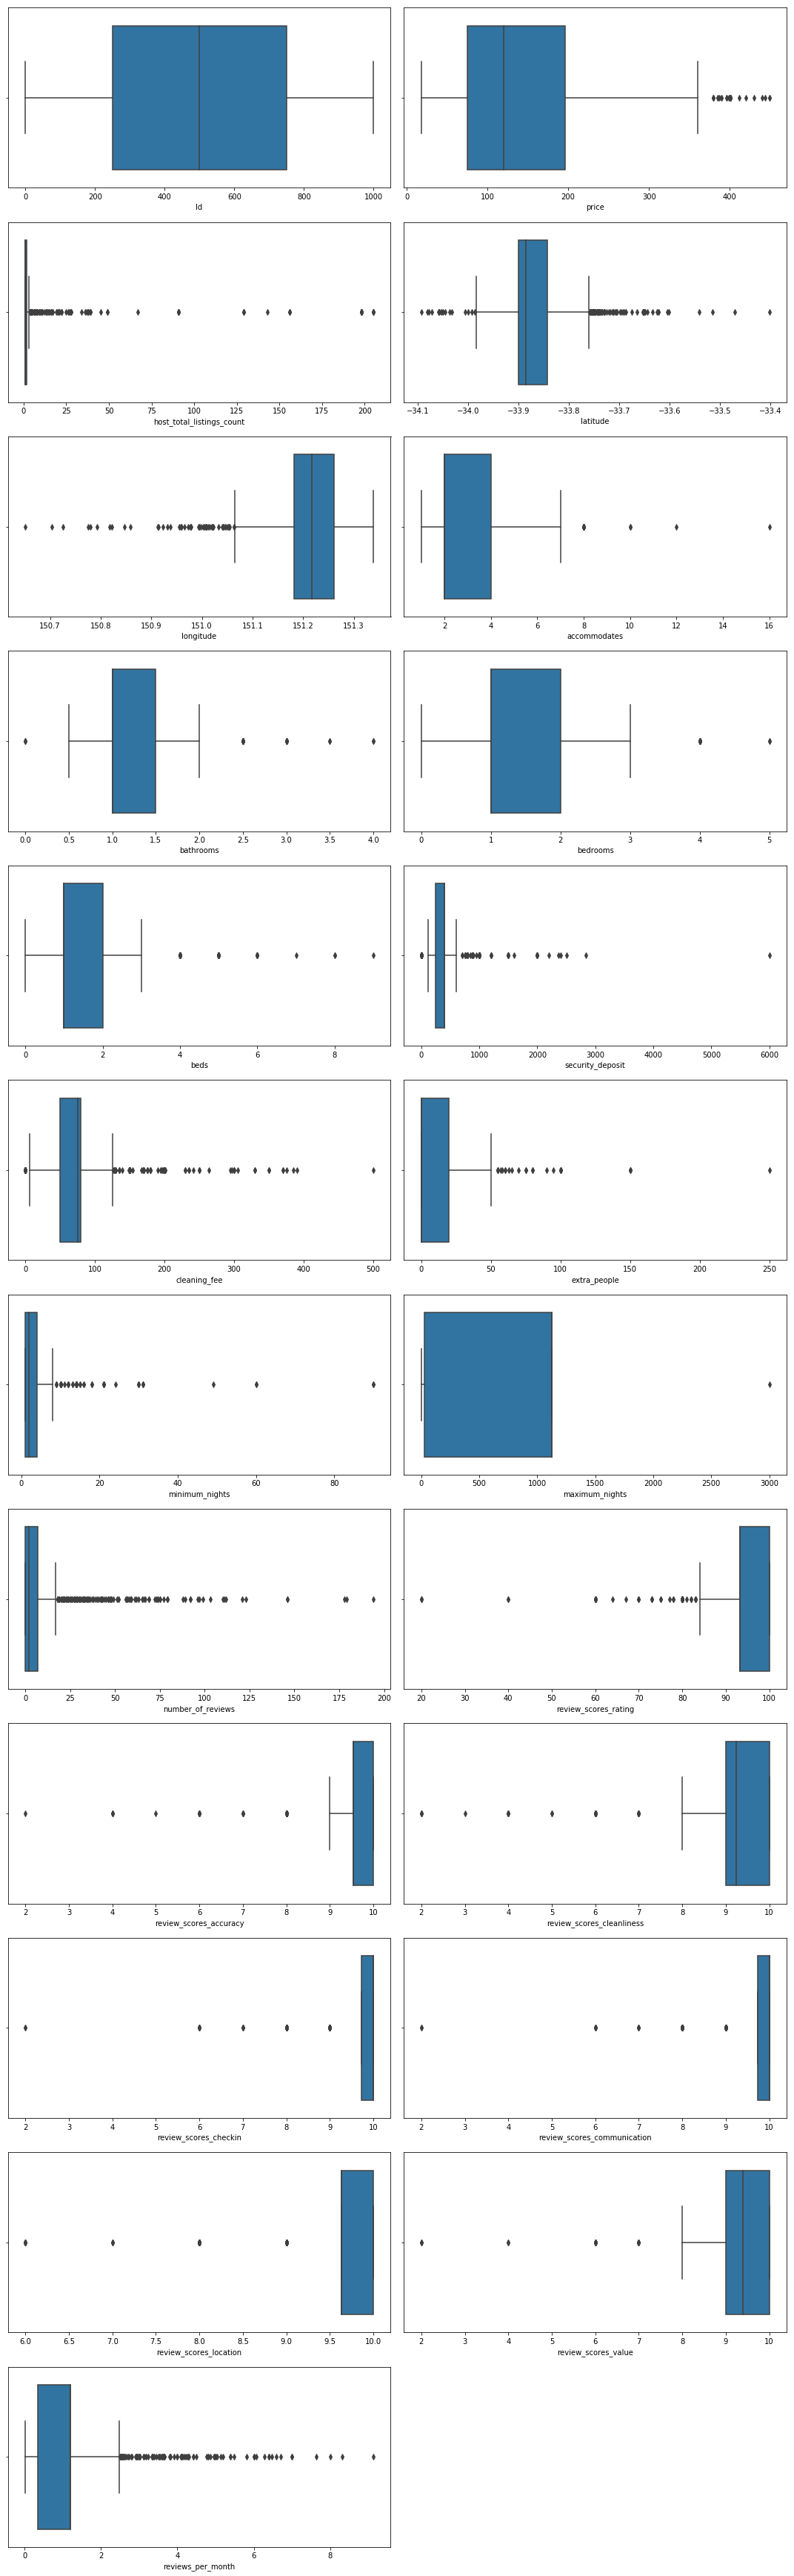

In [740]:
plt.figure(figsize=(15,60))
n=1
for column in air_df.select_dtypes(['int64', 'float64']):
    plt.subplot(15,2,n)
    sns.boxplot(x=air_df[column])
    plt.tight_layout()
    n=n+1
plt.show()

In [741]:
(air_df['security_deposit'].values>3000).sum()

1

In [742]:
air_df=air_df[air_df['security_deposit']<3000]

In [743]:
(air_df['cleaning_fee'].values>400).sum()

1

In [744]:
air_df=air_df[air_df['cleaning_fee']<400]

In [745]:
(air_df['extra_people'].values>150).sum()

1

In [746]:
air_df=air_df[air_df['extra_people']<150]

In [747]:
(air_df['minimum_nights'].values>60).sum()

2

In [748]:
air_df=air_df[air_df['minimum_nights']<60]

In [749]:
(air_df['maximum_nights'].values>1500).sum()

1

In [750]:
air_df=air_df[air_df['maximum_nights']<1500]

In [751]:
(air_df['review_scores_rating'].values<40).sum()

3

In [752]:
air_df=air_df[air_df['review_scores_rating']>40]

#### Scaling Numeric Feautres

In [753]:
from sklearn.preprocessing import MinMaxScaler
num_col

['Id',
 'price',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [755]:
numeric=air_df.loc[:,num_col]
nums=MinMaxScaler().fit_transform(numeric)
nums=np.round_(nums,2)
numeric=pd.DataFrame(nums,columns=num_col)
numeric.shape

(985, 23)

In [756]:
cat_col=[]
for col in air_df.select_dtypes('category'):
    cat_col.append(col)

In [757]:
cat=air_df.loc[:,cat_col]
cat=pd.DataFrame(cat)

In [759]:
cat.shape

(985, 7)

In [760]:
air_df=pd.concat([cat,numeric],axis=1)

In [761]:
air_df.head()

,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,is_business_travel_ready,cancellation_policy,Id,price,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,f,t,Apartment,Entire home/apt,f,f,strict,0.0,0.31,0.10,0.36,0.81,0.07,0.25,0.2,0.11,0.18,0.85,0.0,0.12,1.00,0.01,1.00,1.00,1.0,1.00,1.00,1.00,1.00,0.06
1,f,t,Apartment,Private room,f,f,flexible,0.0,0.11,0.00,0.28,0.76,0.07,0.38,0.2,0.11,0.14,0.19,0.0,0.42,0.03,0.00,0.83,0.92,0.9,0.93,0.93,0.91,0.92,0.13
2,t,t,House,Entire home/apt,f,f,moderate,0.0,0.71,0.00,0.31,0.83,0.20,0.50,0.4,0.22,0.18,0.46,0.0,0.04,0.08,0.11,0.98,1.00,1.0,1.00,1.00,1.00,0.88,0.26
3,f,f,House,Entire home/apt,f,f,flexible,0.0,0.29,0.00,0.34,0.73,0.33,0.38,0.6,0.44,0.00,0.21,0.0,0.06,1.00,0.02,1.00,1.00,1.0,1.00,1.00,1.00,1.00,0.21
4,f,t,House,Entire home/apt,f,f,moderate,0.0,0.42,0.02,0.27,0.77,0.20,0.25,0.4,0.22,0.12,0.22,0.5,0.02,0.03,0.11,0.93,1.00,1.0,1.00,1.00,1.00,1.00,0.30


In [763]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 30 columns):
host_is_superhost              985 non-null category
host_identity_verified         985 non-null category
property_type                  985 non-null category
room_type                      985 non-null category
instant_bookable               985 non-null category
is_business_travel_ready       985 non-null category
cancellation_policy            985 non-null category
Id                             985 non-null float64
price                          985 non-null float64
host_total_listings_count      985 non-null float64
latitude                       985 non-null float64
longitude                      985 non-null float64
accommodates                   985 non-null float64
bathrooms                      985 non-null float64
bedrooms                       985 non-null float64
beds                           985 non-null float64
security_deposit               985 non-null float64
cle

#### labe encoding for categorical variables

In [764]:
from sklearn.preprocessing import LabelEncoder

In [765]:
le=LabelEncoder()

In [766]:
for col in air_df.select_dtypes('category'):
    air_df[col]=le.fit_transform(air_df[col].astype('str'))

In [767]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 30 columns):
host_is_superhost              1000 non-null int32
host_identity_verified         1000 non-null int32
property_type                  1000 non-null int32
room_type                      1000 non-null int32
instant_bookable               1000 non-null int32
is_business_travel_ready       1000 non-null int32
cancellation_policy            1000 non-null int32
Id                             985 non-null float64
price                          985 non-null float64
host_total_listings_count      985 non-null float64
latitude                       985 non-null float64
longitude                      985 non-null float64
accommodates                   985 non-null float64
bathrooms                      985 non-null float64
bedrooms                       985 non-null float64
beds                           985 non-null float64
security_deposit               985 non-null float64
cleaning_fee     

In [769]:
for num in air_df.select_dtypes('float64'):
    if air_df[num].isnull().sum()!=0:
        air_df[num]=air_df[num].fillna(air_df[num].mean())

#### Modelling 

Model1: scikitlean -Linear Regression

In [770]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

now lets split the data sent in to train and test

In [771]:
x=air_df.drop('price',axis=1)
y=air_df['price']                        #splitting the x-target and y-feature

In [772]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [773]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 29)
(200, 29)
(800,)
(200,)


In [774]:
linreg=LinearRegression()
model1=linreg.fit(x_train,y_train)     #fitting Linear Regression to x_train, y_train

In [775]:
y_pred=model1.predict(x_test)

In [776]:
result=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
result.head()

,Actual,Predicted
507,0.14,0.080100
818,0.12,0.186048
452,0.31,0.430906
368,0.27,0.230496
242,0.10,0.049335


In [777]:
from sklearn import metrics

In [778]:
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
print('Root mean squared error:',RMSE)

Root mean squared error: 0.16194251112342606


In [779]:
r_sq=metrics.r2_score(y_test,y_pred)
print('R_squared error:',r_sq)

R_squared error: 0.5165545420411742


the root mean squared and the R_squared do not fall the in the desirable range. this means the model is not doing a gr8 job here.
so now lets check the residual plot to see if the linear assumptions are satisfied

##### Model2: random Forest

In [780]:
from sklearn.ensemble import RandomForestRegressor

In [781]:
rand=RandomForestRegressor(n_estimators=250, min_samples_leaf=5, max_depth=95)

In [782]:
rand.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=95,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [783]:
pred_rand=rand.predict(x_test)

In [784]:
result=pd.DataFrame({'Actual':y_test, 'Predicted':pred_rand})
result.head()

,Actual,Predicted
507,0.14,0.075812
818,0.12,0.163966
452,0.31,0.480590
368,0.27,0.264155
242,0.10,0.105366


In [785]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test,pred_rand))
RMSE

0.16706171986700008

root mean squared error is 0.168, this means on an averange our prediction is 0.17 $ away from the actual price

In [786]:
rand.score(x_train,y_train)

0.8020795615243925

The Random Forest model is doing a very good job over here. 0.7983 is a good score. its giving is almost 80% accuracy

In [787]:
importance=rand.feature_importances_

In [788]:
feature_imp=pd.DataFrame({'columns':x_test.columns,'importances':importances})
feature_imp

,columns,importances
0,host_is_superhost,0.000639
1,host_identity_verified,0.006590
2,property_type,0.005171
3,room_type,0.003120
4,instant_bookable,0.003722
5,is_business_travel_ready,0.000000
6,cancellation_policy,0.008687
7,Id,0.034872
8,host_total_listings_count,0.004404
9,latitude,0.042643


From the above table it is evident that Accommodates, bedrooms and cleaning fee are the most significant variables 